<a href="https://colab.research.google.com/github/manojnaik06/-C-PROGRAMS/blob/main/RT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix

In [ ]:
df = pd.read_csv("/content/creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25833,33785,-0.187402,0.445507,2.199225,3.030535,-0.361376,1.095100,-0.119594,0.245950,-0.371890,...,0.154001,0.813468,0.377732,0.201209,-1.671394,-0.064077,0.067891,0.021521,42.33,0.0
25834,33785,1.237064,0.312096,0.191934,0.496764,-0.129777,-0.551625,-0.007160,-0.048880,-0.240393,...,-0.255114,-0.759423,0.072774,-0.035961,0.238605,0.096858,-0.025772,0.017772,1.79,0.0
25835,33785,1.245292,-0.594493,0.275982,-0.578346,-0.920599,-0.865570,-0.321689,-0.217249,-1.007295,...,0.303333,0.736260,-0.102900,0.452253,0.510125,-0.114928,0.003129,0.021850,70.75,0.0
25836,33787,-0.697373,0.401180,0.803750,-1.015524,-0.226100,0.283660,0.094868,0.077613,-1.327124,...,0.118688,0.467655,-0.162958,-0.703390,-0.174347,-0.202938,-0.369636,-0.152421,49.95,0.0


In [ ]:
print("Dataset Shape:", df.shape)
df.describe()

Dataset Shape: (25838, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,25838.000000,25838.000000,25838.000000,25837.000000,25837.000000,25837.000000,25837.000000,25837.000000,25837.000000,25837.000000,...,25837.000000,25837.000000,25837.000000,25837.000000,25837.000000,25837.000000,25837.000000,25837.000000,25837.000000,25837.000000
mean,19376.128532,-0.225653,0.166976,0.723131,0.229368,-0.194354,0.079800,-0.128669,0.026060,0.441922,...,-0.037598,-0.132262,-0.039778,0.011174,0.129413,0.023418,0.013306,0.004153,75.808937,0.003406
std,11653.899424,1.889055,1.552796,1.684909,1.434242,1.436206,1.323018,1.319114,1.341622,1.269785,...,0.817316,0.641426,0.538789,0.590048,0.436213,0.516670,0.397674,0.280120,219.661154,0.058262
min,0.000000,-30.552380,-40.978852,-31.103685,-5.172595,-42.147898,-23.496714,-26.548144,-41.484823,-7.175097,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.338556,-8.567638,-9.617915,0.000000,0.000000
25%,7694.750000,-0.951266,-0.405158,0.279675,-0.683788,-0.779682,-0.662365,-0.594982,-0.164442,-0.384700,...,-0.249309,-0.552080,-0.173949,-0.325263,-0.133337,-0.338941,-0.065269,-0.008898,6.060000,0.000000
50%,22684.000000,-0.267973,0.176509,0.862364,0.204882,-0.224921,-0.179636,-0.067756,0.029393,0.358908,...,-0.097962,-0.106938,-0.049040,0.063000,0.167170,-0.052787,0.007047,0.019985,18.960000,0.000000
75%,30231.500000,1.166499,0.818206,1.489349,1.109950,0.320600,0.466671,0.446339,0.287518,1.200785,...,0.072314,0.276513,0.075082,0.399042,0.410283,0.306226,0.091845,0.076753,67.610000,0.000000
max,33787.000000,1.960497,16.713389,4.101716,13.143668,34.099309,22.529298,36.677268,20.007208,10.392889,...,22.614889,5.805795,13.876221,4.014444,5.525093,3.517346,11.135740,4.860769,7879.420000,1.000000


In [ ]:
fraud = df[df['Class'] == 1]
valid = df[df['Class'] == 0]

In [ ]:
outlierFraction = len(fraud) / float(len(valid))
print("\nOutlier Fraction:", outlierFraction)


Outlier Fraction: 0.0034176084508136238


In [ ]:
print("\nAmount details of the fraudulent transaction:")
print(fraud.Amount.describe())


Amount details of the fraudulent transaction:
count      88.000000
mean      100.010000
std       265.845031
min         0.000000
25%         1.000000
50%         1.000000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64


In [ ]:
print("\nFraud Cases: {}".format(len(fraud)))


Fraud Cases: 88


In [ ]:
print("\nDetails of valid transaction:")
print(valid.Amount.describe())


Details of valid transaction:
count    25749.000000
mean        75.726227
std        219.488324
min          0.000000
25%          6.200000
50%         18.960000
75%         67.500000
max       7879.420000
Name: Amount, dtype: float64


In [ ]:
print("\nValid Transactions: {}".format(len(valid)))


Valid Transactions: 25749


/tmp/ipython-input-2767008606.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette='Set2')


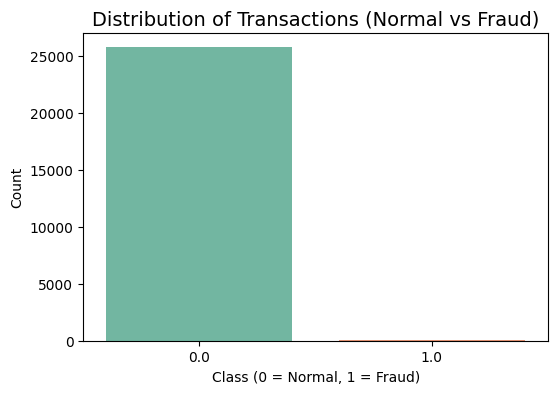

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df, palette='Set2')
plt.title("Distribution of Transactions (Normal vs Fraud)", fontsize=14)
plt.xlabel("Class (0 = Normal, 1 = Fraud)")
plt.ylabel("Count")
plt.show()

/tmp/ipython-input-3891285982.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='Amount', data=df, palette="coolwarm")


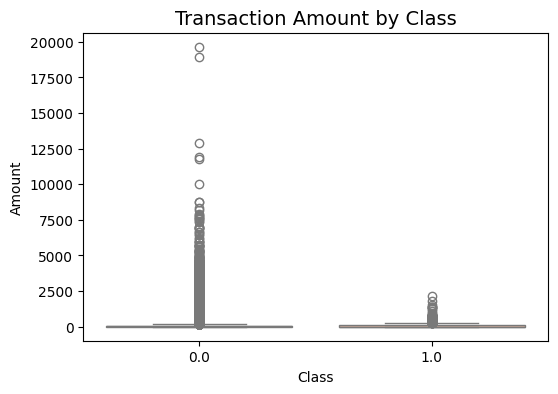

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Class', y='Amount', data=df, palette="coolwarm")
plt.title("Transaction Amount by Class", fontsize=14)
plt.show()

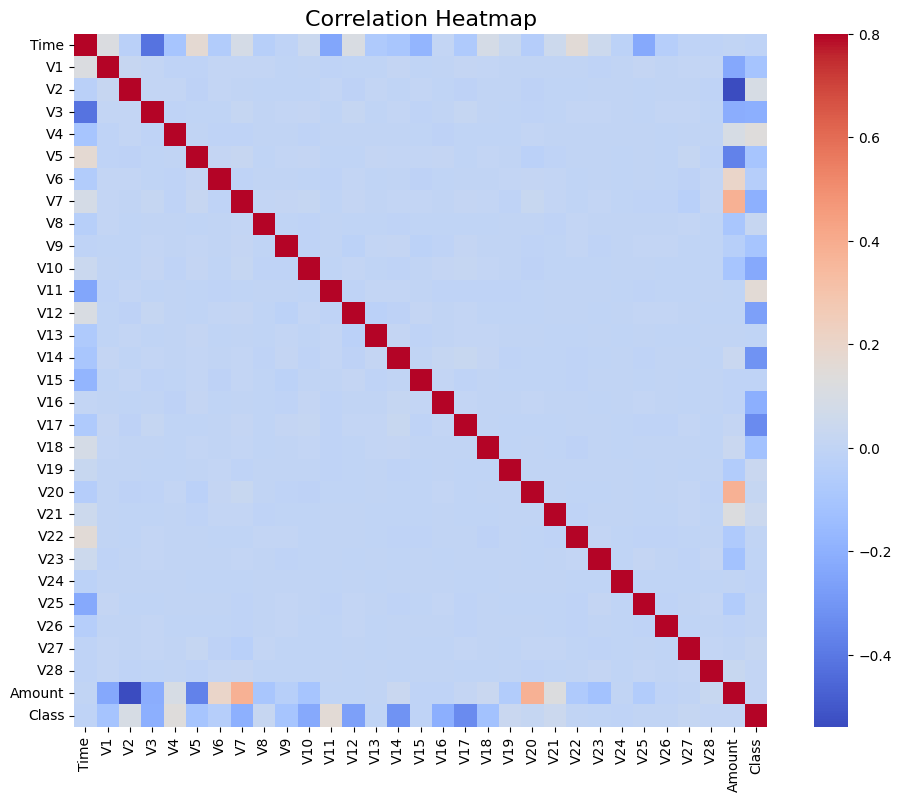

In [ ]:
plt.figure(figsize=(12, 9))
corrmat = df.corr()
sns.heatmap(corrmat, cmap="coolwarm", vmax=0.8, square=True, annot=False)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

In [ ]:
X = df.drop(['Class'], axis=1)
Y = df["Class"]

In [ ]:
print("\nFeature Matrix Shape:", X.shape)
print("Target Shape:", Y.shape)


Feature Matrix Shape: (25838, 30)
Target Shape: (25838,)


In [ ]:
xData = X.values
yData = Y.values

In [ ]:
xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, test_size=0.2, random_state=42)


In [ ]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(xTrain, yTrain)
yPred = rfc.predict(xTest)

In [ ]:
nan_mask = np.isnan(yTest)
yTest_cleaned = yTest[~nan_mask]
yPred_cleaned = yPred[~nan_mask]

In [ ]:
accuracy = accuracy_score(yTest_cleaned, yPred_cleaned)
precision = precision_score(yTest_cleaned, yPred_cleaned)
recall = recall_score(yTest_cleaned, yPred_cleaned)
f1 = f1_score(yTest_cleaned, yPred_cleaned)
mcc = matthews_corrcoef(yTest_cleaned, yPred_cleaned)

print("\nModel Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Matthews Correlation Coefficient: {mcc:.4f}")


Model Evaluation Metrics:
Accuracy: 0.9988
Precision: 0.8750
Recall: 0.7778
F1-Score: 0.8235
Matthews Correlation Coefficient: 0.8244


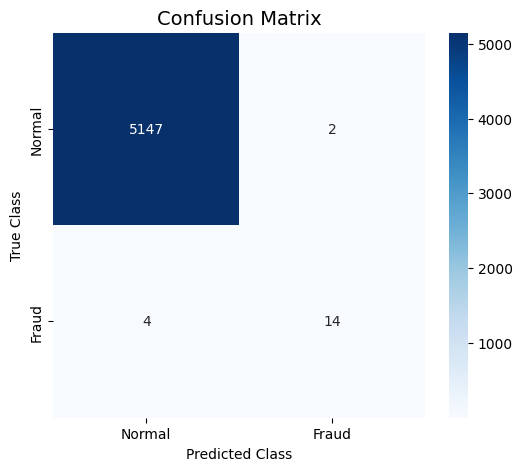

In [ ]:
conf_matrix = confusion_matrix(yTest_cleaned, yPred_cleaned)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.title("Confusion Matrix", fontsize=14)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

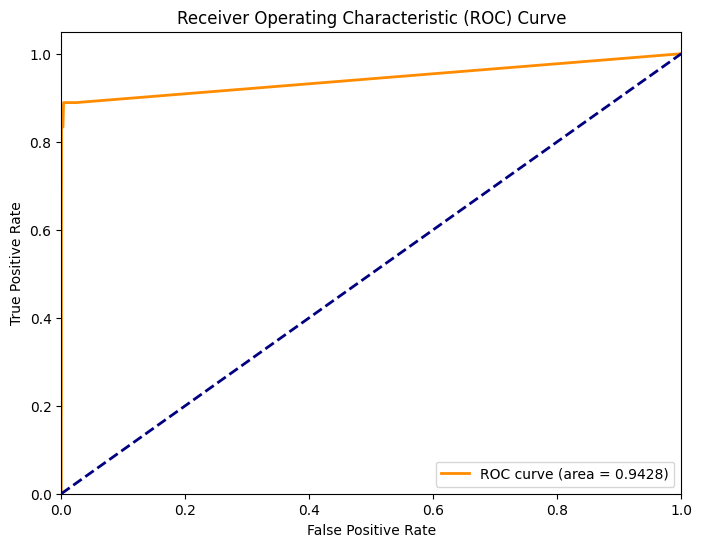

In [ ]:
from sklearn.metrics import roc_curve, auc

# Get the probability of the positive class (fraud)
yPred_proba = rfc.predict_proba(xTest)[~nan_mask][:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(yTest_cleaned, yPred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()